In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [68]:
import kagglehub

path = kagglehub.dataset_download("shariful07/student-mental-health")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-mental-health' dataset.
Path to dataset files: /kaggle/input/student-mental-health


In [69]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/shariful07/student-mental-health/versions/3/Student Mental health.csv')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [70]:
df = df.dropna(subset=['Timestamp'])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [71]:
df.drop(columns='Timestamp', inplace=True)


In [72]:
df.isnull().sum()

,0
Choose your gender,0
Age,1
What is your course?,0
Your current year of Study,0
What is your CGPA?,0
Marital status,0
Do you have Depression?,0
Do you have Anxiety?,0
Do you have Panic attack?,0
Did you seek any specialist for a treatment?,0


In [73]:
df['Choose your gender'].replace('Male', 1, inplace=True)
df['Choose your gender'].replace('Female', 0, inplace=True)
df


/tmp/ipython-input-440264022.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Choose your gender'].replace('Male', 1, inplace=True)
/tmp/ipython-input-440264022.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,1,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,1,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,0,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,1,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,1,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,0,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,0,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [74]:
df['Your current year of Study'].replace('year 1', 1, inplace=True)
df['Your current year of Study'].replace('year 2', 2, inplace=True)
df['Your current year of Study'].replace('year 3', 3, inplace=True)
df['Your current year of Study'].replace('year 4', 4, inplace=True)
df

/tmp/ipython-input-2222602293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Your current year of Study'].replace('year 1', 1, inplace=True)
/tmp/ipython-input-2222602293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,1,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,1,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,0,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,1,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,1,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,0,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,0,23.0,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [75]:
df['Your current year of Study'].replace('Year 1', 1, inplace=True)
df['Your current year of Study'].replace('Year 2', 2, inplace=True)
df['Your current year of Study'].replace('Year 3', 3, inplace=True)
df['Your current year of Study'].replace('Year 4', 4, inplace=True)
df

/tmp/ipython-input-1741684403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Your current year of Study'].replace('Year 1', 1, inplace=True)
/tmp/ipython-input-1741684403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,1,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,1,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,0,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,1,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,1,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No
98,0,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,0,23.0,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [120]:
df['Your current year of Study'].value_counts()

,count
Your current year of Study,
1,43
2,26
3,24
4,8


In [76]:
df['Marital status'].replace('Yes', 1, inplace=True)
df['Marital status'].replace('No', 0, inplace=True)
df

/tmp/ipython-input-4112852555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marital status'].replace('Yes', 1, inplace=True)
/tmp/ipython-input-4112852555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18.0,Engineering,1,3.00 - 3.49,0,Yes,No,Yes,No
1,1,21.0,Islamic education,2,3.00 - 3.49,0,No,Yes,No,No
2,1,19.0,BIT,1,3.00 - 3.49,0,Yes,Yes,Yes,No
3,0,22.0,Laws,3,3.00 - 3.49,1,Yes,No,No,No
4,1,23.0,Mathemathics,4,3.00 - 3.49,0,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,BCS,1,3.50 - 4.00,0,No,Yes,No,No
97,1,18.0,Engineering,2,3.00 - 3.49,0,Yes,Yes,No,No
98,0,19.0,Nursing,3,3.50 - 4.00,1,Yes,No,Yes,No
99,0,23.0,Pendidikan Islam,4,3.50 - 4.00,0,No,No,No,No


In [77]:
df['Did you seek any specialist for a treatment?'].replace('Yes', 1, inplace=True)
df['Did you seek any specialist for a treatment?'].replace('No', 0, inplace=True)
df['Do you have Anxiety?'].replace('Yes', 1, inplace=True)
df['Do you have Anxiety?'].replace('No', 0, inplace=True)
df['Do you have Panic attack?'].replace('Yes', 1, inplace=True)
df['Do you have Panic attack?'].replace('No', 0, inplace=True)
df['Do you have Depression?'].replace('Yes', 1, inplace=True)
df['Do you have Depression?'].replace('No', 0, inplace=True)
df


/tmp/ipython-input-1097763094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Did you seek any specialist for a treatment?'].replace('Yes', 1, inplace=True)
/tmp/ipython-input-1097763094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,0,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,1,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,1,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,0,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,1,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,BCS,1,3.50 - 4.00,0,0,1,0,0
97,1,18.0,Engineering,2,3.00 - 3.49,0,1,1,0,0
98,0,19.0,Nursing,3,3.50 - 4.00,1,1,0,1,0
99,0,23.0,Pendidikan Islam,4,3.50 - 4.00,0,0,0,0,0


In [78]:
df.columns.to_numpy()


array(['Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?',
       'Marital status', 'Do you have Depression?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'], dtype=object)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Choose your gender                            101 non-null    int64  
 1   Age                                           100 non-null    float64
 2   What is your course?                          101 non-null    object 
 3   Your current year of Study                    101 non-null    int64  
 4   What is your CGPA?                            101 non-null    object 
 5   Marital status                                101 non-null    int64  
 6   Do you have Depression?                       101 non-null    int64  
 7   Do you have Anxiety?                          101 non-null    int64  
 8   Do you have Panic attack?                     101 non-null    int64  
 9   Did you seek any specialist for a treatment?  101 non-null    int

In [80]:
df['What is your CGPA?'].to_numpy()

array(['3.00 - 3.49', '3.00 - 3.49', '3.00 - 3.49', '3.00 - 3.49',
       '3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '3.50 - 4.00',
       '2.50 - 2.99', '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00',
       '3.00 - 3.49', '3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00',
       '3.00 - 3.49', '3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00',
       '3.00 - 3.49', '3.00 - 3.49', '3.50 - 4.00', '3.00 - 3.49',
       '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00', '3.00 - 3.49',
       '3.50 - 4.00', '3.50 - 4.00', '3.00 - 3.49', '3.00 - 3.49',
       '3.50 - 4.00', '3.50 - 4.00', '3.00 - 3.49', '2.00 - 2.49',
       '3.00 - 3.49', '2.50 - 2.99', '3.50 - 4.00', '2.50 - 2.99',
       '3.00 - 3.49', '3.50 - 4.00', '3.00 - 3.49', '0 - 1.99',
       '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00', '3.50 - 4.00',
       '3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '3.50 - 4.00',
       '3.00 - 3.49', '3.00 - 3.49', '3.50 - 4.00', '3.00 - 3.49',
       '3.50 - 4.00', '3.00 - 3.49', '3.50 - 4.00', '3.00 - 3.49

In [81]:
df['Your current year of Study'].to_numpy()

array([1, 2, 1, 3, 4, 2, 2, 1, 2, 1, 1, 3, 1, 1, 2, 3, 3, 4, 2, 2, 1, 2,
       1, 1, 3, 1, 1, 2, 3, 4, 2, 2, 1, 2, 1, 1, 3, 1, 1, 2, 3, 4, 2, 1,
       2, 1, 1, 4, 2, 3, 1, 2, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 4, 1, 3, 3, 1, 3, 1, 1, 2, 3, 4, 2, 2, 1, 2, 1, 1, 3, 1,
       1, 2, 3, 2, 2, 1, 3, 1, 1, 2, 3, 4, 2])

In [83]:
df["What is your course?"].to_numpy()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Engineering', 'Pendidikan islam', 'BCS', 'Human Resources',
       'Irkhs', 'Psychology', 'Engineering', 'BCS', 'Engineering',
       'KENMS', 'BCS', 'Accounting ', 'ENM', 'BIT', 'Marine science',
       'Engineering', 'KOE', 'BCS', 'Engineering', 'BCS',
       'Banking Studies', 'Engineering', 'Engineering', 'BIT', 'BCS',
       'Business Administration', 'BCS', 'BCS', 'BCS', 'BIT',
       'Engineering', 'Law', 'BIT', 'KIRKHS', 'Engineering', 'BIT',
       'Engineering', 'Usuluddin ', 'BIT', 'TAASL', 'BCS', 'Engineering',
       'Engine', 'BCS', 'BCS', 'ALA', 'BCS', 'Biomedical science', 'koe',
       'BCS', 'BCS', 'Kirkhs', 'BENL', 'BCS', 'Benl', 'IT', 'BCS', 'CTS',
       'engin', 'Engine', 'Econs', 'KOE', 'MHSC', 'Malcom', 'Kop',
       'Biomedical science', 'Laws', 'BIT', 'Biomedical science', 'BIT',
       'KOE', 'Engineering', 'Human Sciences ', 'Biotechnology',
       'Engineering', 'Communication

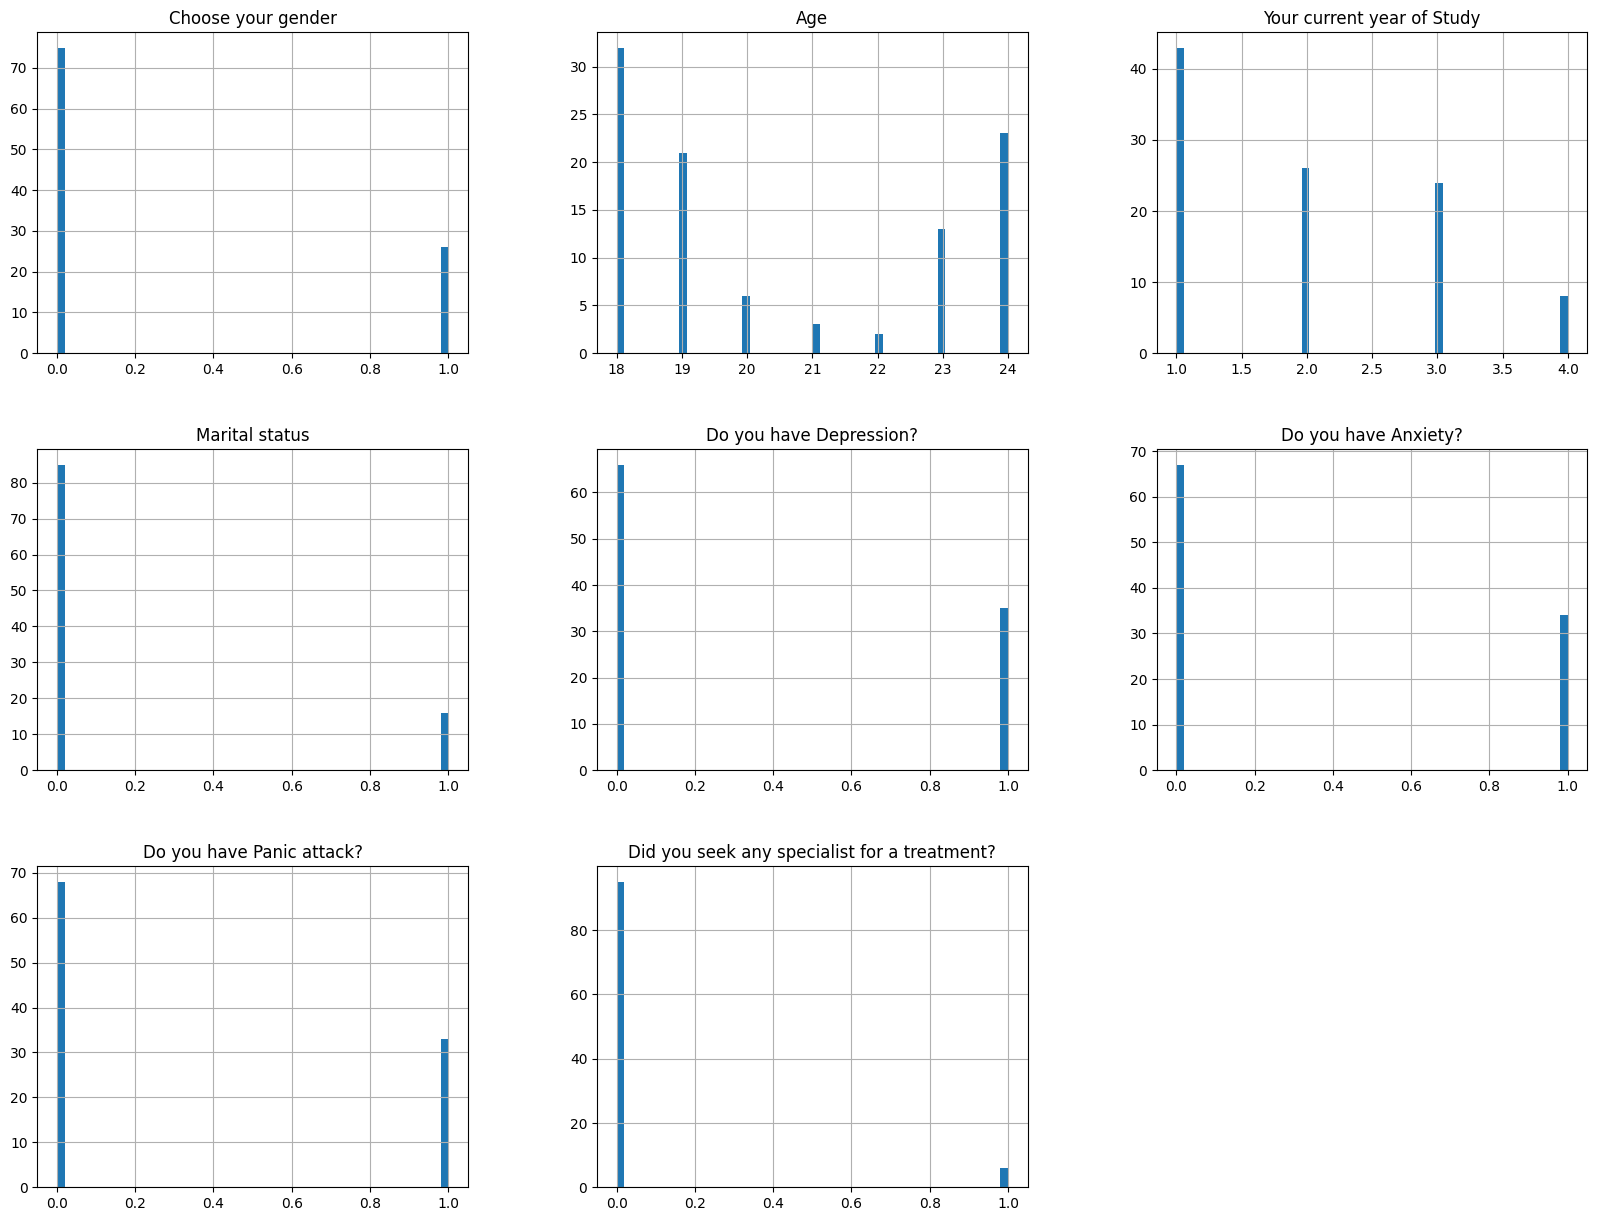

In [84]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [86]:
def to_float(value):
    value = str(value).strip()
    if '-' in value:
        start, end = value.split('-')
        return (float(start.strip()) + float(end.strip())) / 2
    else:

        return float(value)

df['What is your CGPA?'] = df['What is your CGPA?'].apply(to_float)


In [87]:
course_mapping = {

    'engineering': 'Engineering',
    'engine': 'Engineering',
    'engin': 'Engineering',
    'koe': 'Engineering',
    'koe ': 'Engineering',
    'koe.': 'Engineering',

    'bcs': 'Computer Science',
    'bit': 'Computer Science',
    'it': 'Computer Science',
    'cts': 'Computer Science',

    'islamic education': 'Islamic Studies',
    'pendidikan islam': 'Islamic Studies',
    'pendidikan islam ': 'Islamic Studies',
    'islamic education ': 'Islamic Studies',
    'usuluddin': 'Islamic Studies',
    'fiqh': 'Islamic Studies',
    'fiqh fatwa': 'Islamic Studies',
    'irkhs': 'Islamic Studies',
    'kirkhs': 'Islamic Studies',

    'accounting': 'Business',
    'accounting ': 'Business',
    'business administration': 'Business',
    'banking studies': 'Business',
    'econs': 'Business',
    'kenms': 'Business',
    'kop': 'Business',
    'malcom': 'Business',
    'human resources': 'Business',

    'law': 'Law',
    'laws': 'Law',

    'biomedical science': 'Biomedical Science',
    'marine science': 'Science',
    'biotechnology': 'Science',
    'radiography': 'Science',
    'nursing': 'Nursing',
    'diploma nursing': 'Nursing',

    'benl': 'English Studies',
    'benl ': 'English Studies',
    'taasl': 'Language Studies',
    'ala': 'Language Studies',
    'diploma tesl': 'Language Studies',
    'communication': 'Communication',
    'communication ': 'Communication',
    'human sciences': 'Human Sciences',
    'human sciences ': 'Human Sciences',
    'psychology': 'Psychology',
    'psychology ': 'Psychology',
    'mhsc': 'Health Sciences'
}

df['What is your course?'] = df['What is your course?'].replace(course_mapping)


In [88]:
df['What is your course?'].dtype

dtype('O')

In [89]:
df['Course_Code'], course_labels = pd.factorize(df['What is your course?'])
df.drop(columns='What is your course?', inplace=True)
df


,Choose your gender,Age,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Course_Code
0,0,18.0,1,3.245,0,1,0,1,0,0
1,1,21.0,2,3.245,0,0,1,0,0,1
2,1,19.0,1,3.245,0,1,1,1,0,2
3,0,22.0,3,3.245,1,1,0,0,0,3
4,1,23.0,4,3.245,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
96,0,21.0,1,3.750,0,0,1,0,0,6
97,1,18.0,2,3.245,0,1,1,0,0,0
98,0,19.0,3,3.750,1,1,0,1,0,44
99,0,23.0,4,3.750,0,0,0,0,0,45


In [90]:
df.corrwith(df['What is your CGPA?']).sort_values(ascending=False)

,0
What is your CGPA?,1.000000
Do you have Anxiety?,0.172950
Do you have Panic attack?,0.042511
Do you have Depression?,0.041807
Marital status,0.035134
Did you seek any specialist for a treatment?,0.025342
Your current year of Study,0.014071
Age,0.005610
Course_Code,-0.099732
Choose your gender,-0.149679


In [91]:
df.drop(columns='Course_Code', inplace=True)

In [92]:
df.drop(columns='Choose your gender', inplace=True)
df

,Age,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,18.0,1,3.245,0,1,0,1,0
1,21.0,2,3.245,0,0,1,0,0
2,19.0,1,3.245,0,1,1,1,0
3,22.0,3,3.245,1,1,0,0,0
4,23.0,4,3.245,0,0,0,0,0
...,...,...,...,...,...,...,...,...
96,21.0,1,3.750,0,0,1,0,0
97,18.0,2,3.245,0,1,1,0,0
98,19.0,3,3.750,1,1,0,1,0
99,23.0,4,3.750,0,0,0,0,0


In [93]:
df.drop(columns='Age', inplace=True)
df

,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,1,3.245,0,1,0,1,0
1,2,3.245,0,0,1,0,0
2,1,3.245,0,1,1,1,0
3,3,3.245,1,1,0,0,0
4,4,3.245,0,0,0,0,0
...,...,...,...,...,...,...,...
96,1,3.750,0,0,1,0,0
97,2,3.245,0,1,1,0,0
98,3,3.750,1,1,0,1,0
99,4,3.750,0,0,0,0,0


In [94]:
df.columns.to_numpy()

array(['Your current year of Study', 'What is your CGPA?',
       'Marital status', 'Do you have Depression?',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'], dtype=object)

In [96]:
x=df.drop(columns='What is your CGPA?')
y=df['What is your CGPA?']

In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [99]:
yhat = model.predict(x)

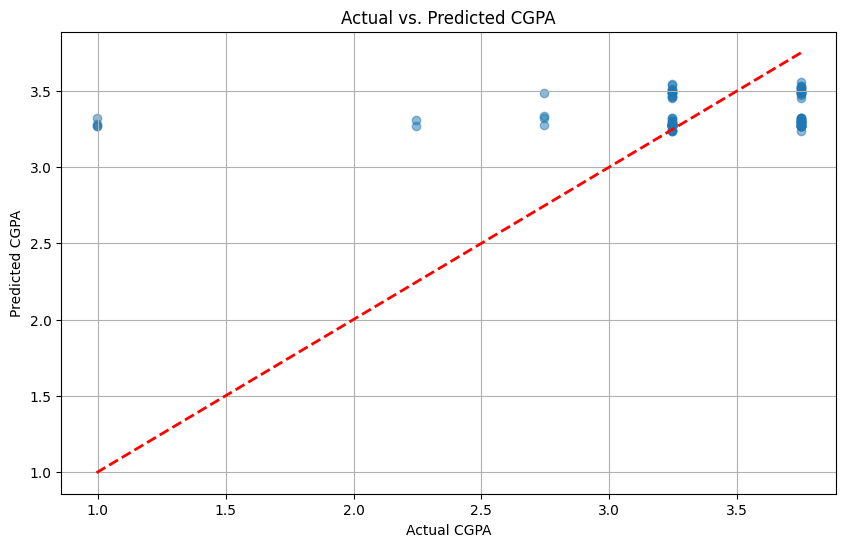

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(y, yhat, alpha=0.5)
plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA")
plt.title("Actual vs. Predicted CGPA")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.grid(True)
plt.show()

In [111]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,y))

MAE: 0.36247193173644277


In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(x)

In [115]:
model.fit(X_poly, y)

LinearRegression()

In [116]:
yhat2= model.predict(X_poly)

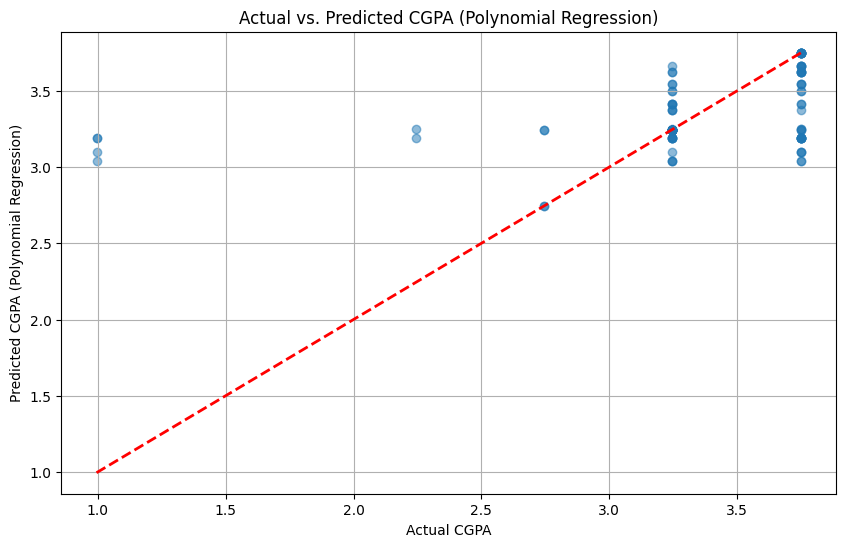

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(y, yhat2, alpha=0.5)
plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA (Polynomial Regression)")
plt.title("Actual vs. Predicted CGPA (Polynomial Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.grid(True)
plt.show()

In [129]:
import pickle

filename = 'polynomial_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to polynomial_regression_model.pkl
